In [1]:
import AssetUtils
import numpy as np
from importlib import reload
reload(AssetUtils)
AssetDatabase = AssetUtils.AssetDatabase
AssetPortfolio = AssetUtils.AssetPortfolio

In [2]:
portfolio = AssetPortfolio('data/my_asset_database')
portfolio.asset_db.load_asset_historicals('data/my_asset_prices')

12 entries loaded from data/my_asset_prices


In [3]:
# assets = ['Арсагера — акции 6.4', 'FXMM', 'FXGD', 'FXAU', 'FXCN', 'FXDE', 'FXJP', 'FXUK', 'FXIT', 'FXUS', 'FXRL', 'FXRB']
# for asset in assets:
#     portfolio.asset_db.update_asset_historical(asset)
# portfolio.asset_db.save_asset_historicals('data/my_asset_prices')

In [4]:
portfolio.add_asset('FXRL')
portfolio.add_asset('FXDE')

In [5]:
portfolio.buy('FXRL', '2017-08-15', 1372, 1, 0.2*6)
portfolio.buy('FXDE', '2017-08-25', 2100, 1, 0.21*10)
# portfolio.buy('FXRB', '2017-08-14', 1900, 5, 0.19*2)
# portfolio.sell('FXRB', '2017-08-18', 2200, 5, 0.22*5)
# portfolio.pay_fee('2017-08-21', 150)
# portfolio.sell('FXRB', '2017-08-19', 2100, 5, 0.21*1)
# portfolio.buy('FXMM', '2017-08-21', 1300, 1, 0.13*20)

In [6]:
portfolio.list_positions()

0   FXRL	 2017-08-15	 buy	 1372.00	 1.00	 1.20
1   FXDE	 2017-08-25	 buy	 2100.00	 1.00	 2.10


In [7]:
print(portfolio.get_money_invested())
print(portfolio.get_fee())
print(portfolio.get_money_withdrawn())
print(portfolio.get_portfolio_price_today())
print(portfolio.get_profit())

3472
3.3000000000000003
0
3916.5
441.2


In [8]:
df = portfolio.get_portfolio_price_span('2017-08-16', '2017-09-15')

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

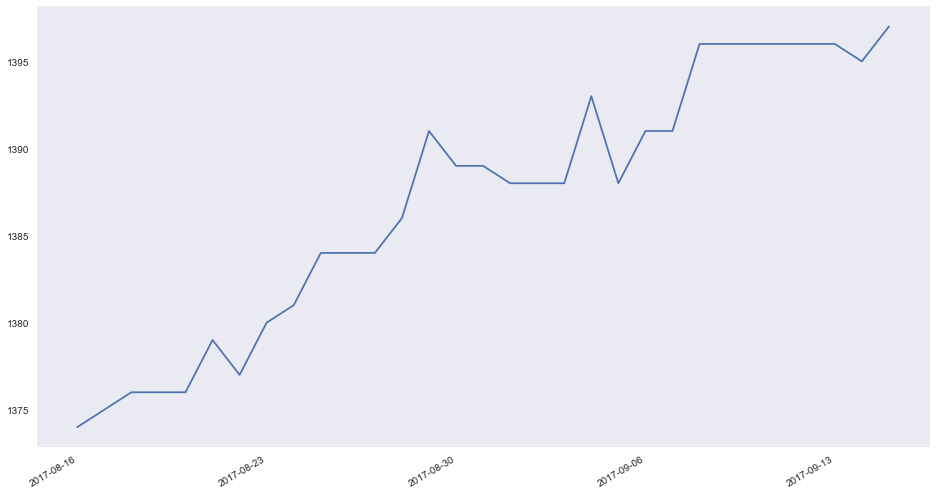

In [23]:
plt.style.use('seaborn')

plt.figure(figsize = (16, 9))
plt.plot(df['date'], df['price']);
plt.gcf().autofmt_xdate()
plt.grid()
plt.show()

In [9]:
portfolio.asset_db.update_asset_historical('FXRL')
portfolio.asset_db.update_asset_historical('FXDE')

Updating historical data (last was 18.09.2017) for FXRL...
Success!
Updating historical data (last was 18.09.2017) for FXDE...
Success!


In [10]:
from datetime import date as date_
import pandas as pd

In [23]:
def build_week_statistics():
    date = pd.to_datetime(date_.today())
    state = get_portfolio_state(date)
    state['Date'] = date
    
    weekday = date.weekday()
    week = pd.Timedelta(weeks = 1)
    prev_date = date - pd.Timedelta(days = weekday)
    states = []
    while True:
        
        prev_state = get_portfolio_state(prev_date)
        
        for key in prev_state.keys():
            if prev_state[key] != 0:
                state[str(key) + ' Change'] = '%.2f' % ((state[key] - prev_state[key]) / prev_state[key] * 100)
            else:
                state[str(key) + ' Change'] = float('nan')
        
        prev_state['Date'] = prev_date
#         print(state)
        states.append(state)
        date = prev_date
        prev_date -= week
        state = prev_state
        
        if state['Portfolio'] == 0:
            break
#     print(state)
    return states
    
def get_portfolio_state(date):
    state = {}
    for asset in portfolio.asset_list:
        state[asset] = portfolio.asset_db.get_asset_historical(asset, date)['price'] 
    state['Portfolio'] = portfolio.get_portfolio_price(date)
    return state


In [24]:
stats = build_week_statistics()
df = pd.DataFrame.from_dict(stats)

In [25]:
df

,Date,FXDE,FXDE Change,FXRL,FXRL Change,Portfolio,Portfolio Change
0,2017-09-28,2060.0,1.08,1869.0,0.38,3929.0,0.74
1,2017-09-25,2038.0,-1.38,1862.0,0.65,3900.0,-0.42
2,2017-09-18,2066.5,1.85,1850.0,0.98,3916.5,1.44
3,2017-09-11,2029.0,2.27,1832.0,1.61,3861.0,1.95
4,2017-09-04,1984.0,-1.95,1803.0,1.24,3787.0,-0.46
5,2017-08-28,2023.5,0.92,1781.0,2.62,3804.5,119.22
6,2017-08-21,2005.0,-1.45,1735.5,-0.94,1735.5,NaN
